In [18]:
import pandas as pd
import json
from datetime import datetime

# 读取JSON文件
with open('danmu632.json', 'r', encoding='utf-8') as file:
    data = file.read()

# 将JSON字符串转换为Python字典
json_data = json.loads(data)

# 提取需要的字段路径
result_string = json_data["data"]["result"]
result_json = json.loads(result_string)  # 将result字符串解析为JSON对象
desired_data = result_json["data"]["result"]

# 创建空列表存储所需数据
formatted_data = []

# 提取所需字段并存储到列表中
for item in desired_data:
    createtime = datetime.fromtimestamp(item["createtime"] / 1000)  # 将时间戳转换为正常时间格式
    content = item["content"]
    formatted_data.append((createtime, content))

# 创建DataFrame
df = pd.DataFrame(formatted_data, columns=["createtime", "content"])

# 将DataFrame写入Excel文件
df.to_excel('danmuceshi632.xlsx', index=False)


Building prefix dict from the default dictionary ...
Loading model from cache C:\WINDOWS\TEMP\jieba.cache
Loading model cost 0.774 seconds.
Prefix dict has been built successfully.


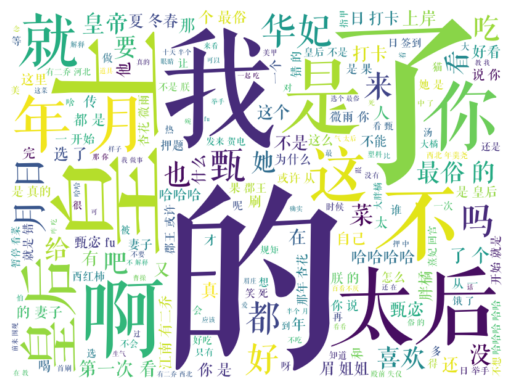

In [21]:
import pandas as pd
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 使用pandas读取xlsx文件
df = pd.read_excel('danmutext1.xlsx', engine='openpyxl')

# 获取所有文本并连接成一个字符串
text = ' '.join(df['text'])

# 使用jieba进行分词
words = ' '.join(jieba.cut(text))

# 创建词云
wordcloud = WordCloud(font_path='南宋书局体.ttf', width=800, height=600, background_color='white').generate(words)

# 显示词云
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

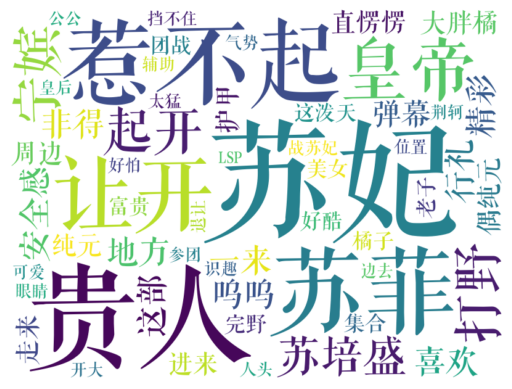

In [14]:
import pandas as pd
import jieba
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import re

# 使用pandas读取xlsx文件
df = pd.read_excel('danmutext2.xlsx', engine='openpyxl')

# 获取所有文本并连接成一个字符串
text = ' '.join(df['text'])

# 使用jieba进行分词
words_list = jieba.cut(text)



# Filter out words containing specified characters, numeric digits, and words that are only one character in length
filtered_words = [word for word in words_list if 
                  ('哈' not in word) and 
                  ('不是' not in word) and 
                  ('就是' not in word) and 
                  ('fu' not in word) and 
                  (not re.search(r'\d', word)) and  # Filter out words containing numeric digits
                  ('这个' not in word) and 
                  ('什么' not in word) and 
                  (len(word) > 1)]


# Compute word frequencies using Counter
word_frequencies = Counter(filtered_words)

# Sort frequencies in descending order
sorted_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)
# Filter out words containing '哈' and words that are only one character in length
filtered_sorted_frequencies = [(word, freq) for word, freq in sorted_frequencies if ('哈' not in word) and (len(word) > 1)]


# Display the sorted frequencies
for word, freq in sorted_frequencies:
    if freq > 10:
        print(f"{word}: {freq}")

# Define a constant color function
def constant_color_func(*args, **kwargs):
    return "#000000"  # black color; you can set it to any color you prefer

# 创建词云 with fewer words and a constant color
wordcloud = WordCloud(font_path='南宋书局体.ttf', 
                      width=800, 
                      height=600, 
                      background_color='white', 
                      max_words=100,  # display top 100 words; adjust as per your needs

                     ).generate_from_frequencies(word_frequencies)

# 显示词云
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save to a .jpg file
wordcloud.to_file("output1.jpg")

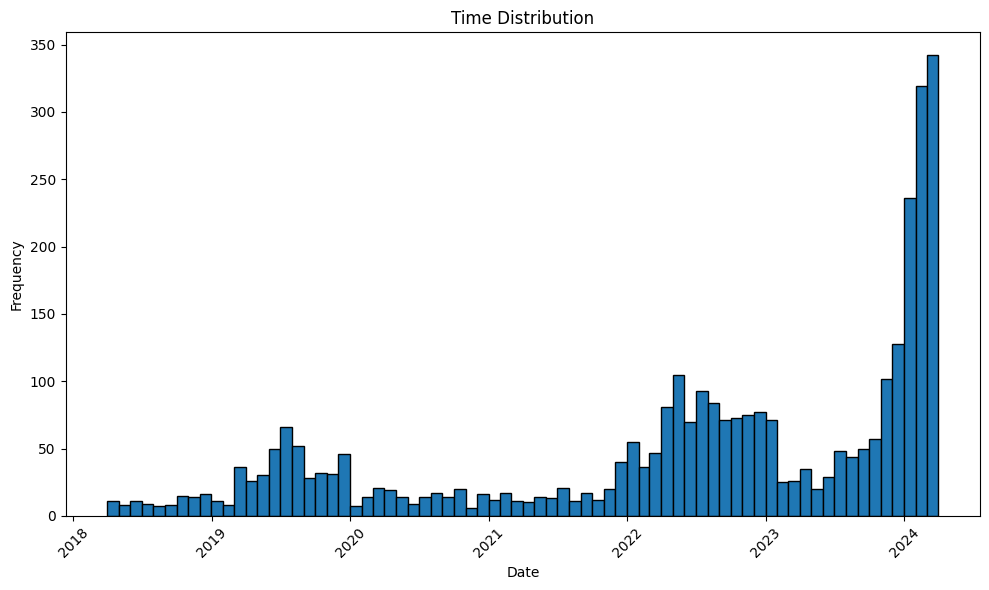

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取时间表
df = pd.read_excel('time.xlsx')

# 将时间列转换为日期时间格式
df['time'] = pd.to_datetime(df['time'])

# 设置开始时间和结束时间
start_time = pd.Timestamp('2018-03-29 14:37:16')
end_time = pd.Timestamp('2024-04-13 17:32:01')

# 创建一个日期范围
date_range = pd.date_range(start=start_time, end=end_time, freq='M')

# 绘制时间分布的柱状图
plt.figure(figsize=(10, 6))
plt.hist(df['time'], bins=date_range, edgecolor='black')
plt.title('Time Distribution')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


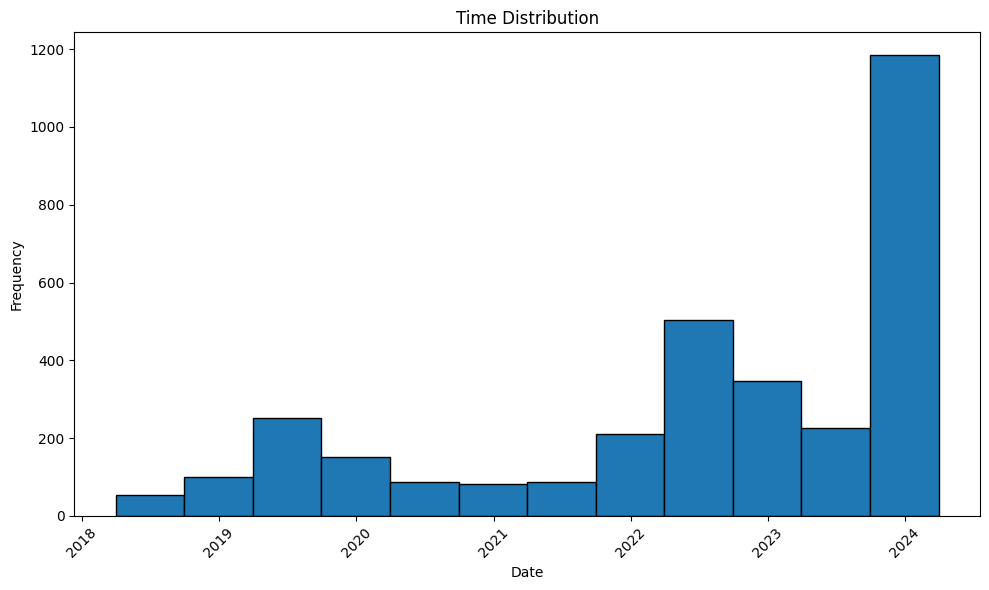

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取时间表
df = pd.read_excel('time.xlsx')

# 将时间列转换为日期时间格式
df['time'] = pd.to_datetime(df['time'])

# 设置开始时间和结束时间
start_time = pd.Timestamp('2018-03-29 14:37:16')
end_time = pd.Timestamp('2024-04-13 17:32:01')

# 创建一个日期范围，每六个月一个区间
date_range = pd.date_range(start=start_time, end=end_time, freq='6M')

# 绘制时间分布的柱状图
plt.figure(figsize=(10, 6))
plt.hist(df['time'], bins=date_range, edgecolor='black')
plt.title('Time Distribution')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Windows\Temp\ipykernel_18116\1769507205.py:24: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  plt.tight_layout()
C:\Windows\Temp\ipykernel_18116\1769507205.py:24: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  plt.tight_layout()
C:\Windows\Temp\ipykernel_18116\1769507205.py:24: UserWarning: Glyph 24377 (\N{CJK UNIFIED IDEOGRAPH-5F39}) missing from current font.
  plt.tight_layout()
C:\Windows\Temp\ipykernel_18116\1769507205.py:24: UserWarning: Glyph 24149 (\N{CJK UNIFIED IDEOGRAPH-5E55}) missing from current font.
  plt.tight_layout()
C:\Windows\Temp\ipykernel_18116\1769507205.py:24: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from current font.
  plt.tight_layout()
C:\Windows\Temp\ipykernel_18116\1769507205.py:24: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from current font.
  plt.tight_layout()
C:\Windows\Temp\ipykernel_18116\1769507205.py:24: UserWarning: G

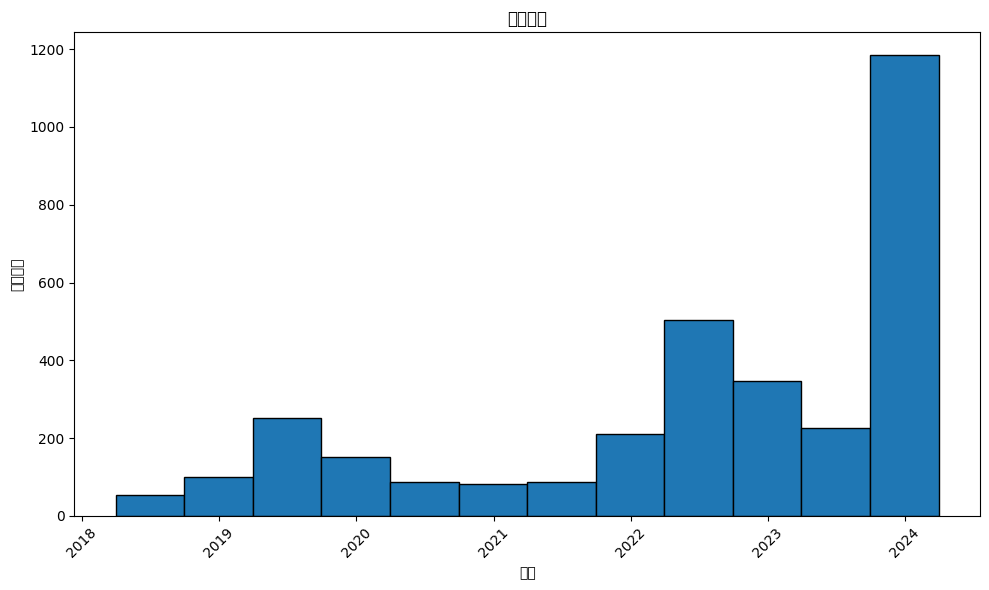

Frequency Statistics:
time
(2018-03-31 14:37:16, 2018-09-30 14:37:16]      54
(2018-09-30 14:37:16, 2019-03-31 14:37:16]     100
(2019-03-31 14:37:16, 2019-09-30 14:37:16]     252
(2019-09-30 14:37:16, 2020-03-31 14:37:16]     151
(2020-03-31 14:37:16, 2020-09-30 14:37:16]      87
(2020-09-30 14:37:16, 2021-03-31 14:37:16]      82
(2021-03-31 14:37:16, 2021-09-30 14:37:16]      86
(2021-09-30 14:37:16, 2022-03-31 14:37:16]     210
(2022-03-31 14:37:16, 2022-09-30 14:37:16]     504
(2022-09-30 14:37:16, 2023-03-31 14:37:16]     347
(2023-03-31 14:37:16, 2023-09-30 14:37:16]     226
(2023-09-30 14:37:16, 2024-03-31 14:37:16]    1184
dtype: int64


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取时间表
df = pd.read_excel('time.xlsx')

# 将时间列转换为日期时间格式
df['time'] = pd.to_datetime(df['time'])

# 设置开始时间和结束时间
start_time = pd.Timestamp('2018-03-29 14:37:16')
end_time = pd.Timestamp('2024-04-13 17:32:01')

# 创建一个日期范围，每六个月一个区间
date_range = pd.date_range(start=start_time, end=end_time, freq='6M')

# 绘制时间分布的柱状图
plt.figure(figsize=(10, 6))
plt.hist(df['time'], bins=date_range, edgecolor='black')
plt.title('时间分布')
plt.xlabel('日期')
plt.ylabel('弹幕频次')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 计算每个区间的频率统计
freq_stats = df.groupby(pd.cut(df['time'], bins=date_range)).size()

print("Frequency Statistics:")
print(freq_stats)

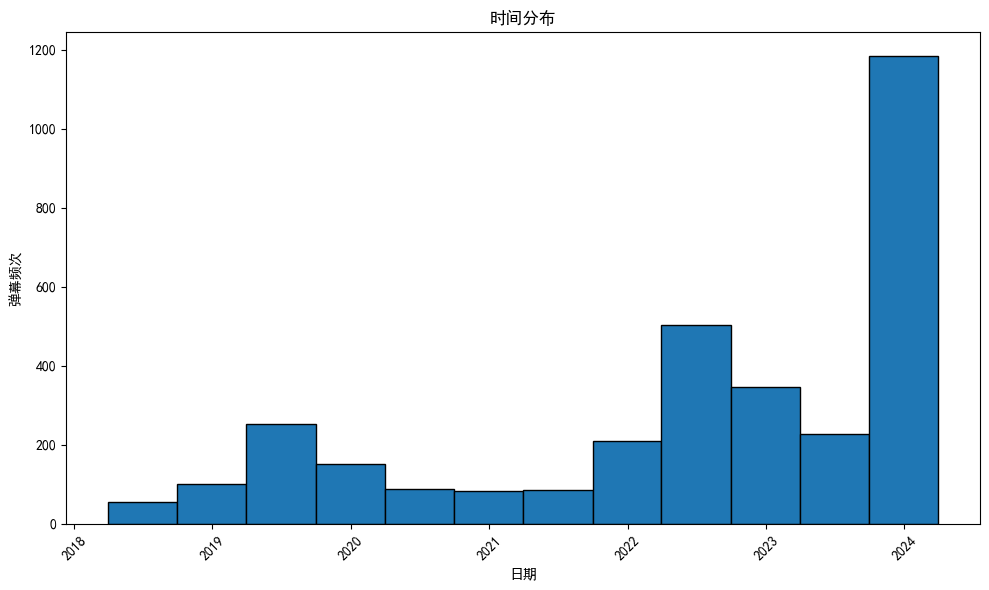

Frequency Statistics:
time
(2018-03-31 14:37:16, 2018-09-30 14:37:16]      54
(2018-09-30 14:37:16, 2019-03-31 14:37:16]     100
(2019-03-31 14:37:16, 2019-09-30 14:37:16]     252
(2019-09-30 14:37:16, 2020-03-31 14:37:16]     151
(2020-03-31 14:37:16, 2020-09-30 14:37:16]      87
(2020-09-30 14:37:16, 2021-03-31 14:37:16]      82
(2021-03-31 14:37:16, 2021-09-30 14:37:16]      86
(2021-09-30 14:37:16, 2022-03-31 14:37:16]     210
(2022-03-31 14:37:16, 2022-09-30 14:37:16]     504
(2022-09-30 14:37:16, 2023-03-31 14:37:16]     347
(2023-03-31 14:37:16, 2023-09-30 14:37:16]     226
(2023-09-30 14:37:16, 2024-03-31 14:37:16]    1184
dtype: int64


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文显示字体

# 读取时间表
df = pd.read_excel('time.xlsx')

# 将时间列转换为日期时间格式
df['time'] = pd.to_datetime(df['time'])

# 设置开始时间和结束时间
start_time = pd.Timestamp('2018-03-29 14:37:16')
end_time = pd.Timestamp('2024-04-13 17:32:01')

# 创建一个日期范围，每六个月一个区间
date_range = pd.date_range(start=start_time, end=end_time, freq='6M')

# 绘制时间分布的柱状图
plt.figure(figsize=(10, 6))
plt.hist(df['time'], bins=date_range, edgecolor='black')
plt.title('时间分布')
plt.xlabel('日期')
plt.ylabel('弹幕频次')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('time_distribution.png')
plt.show()

# 计算每个区间的频率统计
freq_stats = df.groupby(pd.cut(df['time'], bins=date_range)).size()

print("Frequency Statistics:")
print(freq_stats)


In [3]:
import pandas as pd
import json
from datetime import datetime

# 读取JSON文件
with open('mg.json', 'r', encoding='utf-8') as file:
    data = file.read()

# 将JSON字符串转换为Python字典
json_data = json.loads(data)

# 提取需要的字段路径
result_string = json_data["data"]["items"]

# 创建空列表存储所需数据
formatted_data = []

# 提取所需字段并存储到列表中
for item in result_string:
    content = item["content"]
    formatted_data.append((content))

# 创建DataFrame
df = pd.DataFrame(formatted_data, columns=["content"])

# 将DataFrame写入Excel文件
df.to_excel('mg.xlsx', index=False)

In [1]:
import datetime

timestamp = 60862
readable_time = datetime.datetime.utcfromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S')
print(readable_time)

1970-01-01 16:54:22


In [5]:
import requests
import pandas as pd
import time
import datetime
from fake_useragent import UserAgent

ua = UserAgent()
url = "https://galaxy.bz.mgtv.com/cdn/opbarrage"

rdb_content = {'id': [], 'type': [], 'uid': [], 'content': [], 'add_time': [], 'ups': []}
count = 0

print("爬取开始时间: {}".format(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')))

for i in range(0, 91):

    querystring = {"vid": "15887959", "cid": "436137", "time": i*60000}

    headers = {
        'User-Agent': ua.random
        }

    try:
        response = requests.request("GET", url, headers=headers, params=querystring).json()
        items = response['data']['items']
        if items is None:
            print("爬取完毕！弹幕数量{}".format(count))
            break
        else:
            for item in items:
                rdb_content['id'].append(item.get('id'))
                rdb_content['type'].append(item.get('type'))
                rdb_content['uid'].append(item.get('uid'))
                rdb_content['content'].append(item.get('content'))
                rdb_content['add_time'].append(item.get('time'))
                rdb_content['ups'].append(item.get('up', 0))
                count = count + 1

            print("爬取第{}分钟的弹幕...，当前弹幕数量{}".format(i + 1, count))
        time.sleep(5)
    except:
        print("第{}分钟弹幕爬取失败!当前弹幕数量{}".format(i + 1, count))
        continue
    rdb_df = pd.DataFrame(rdb_content)
    rdb_df.to_csv('opbarrage.csv', index=None)


爬取开始时间: 2024-04-24 19:35:04
爬取完毕！弹幕数量0


In [7]:
import requests
import pandas as pd
import time
import datetime

# 设置请求的 URL 的模板
url_template = "https://bullet-ws.hitv.com/bullet/tx/2024/04/24/181623/15887959/{}.json"

rdb_content = {'id': [], 'type': [], 'uid': [], 'content': [], 'add_time': [], 'ups': []}
count = 0

print("爬取开始时间: {}".format(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')))

# 初始化文件编号为 1
file_number = 1

# 循环直到抓取不到弹幕为止
while True:
    # 构建当前请求的 URL
    url = url_template.format(file_number)

    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36'
        }

    try:
        # 发送 GET 请求并获取响应
        response = requests.get(url, headers=headers)

        # 如果响应状态码不是 200，则跳出循环
        if response.status_code != 200:
            print("爬取完毕！弹幕数量{}".format(count))
            break

        # 解析返回的 JSON 数据
        data = response.json()

        # 如果数据为空，则跳出循环
        if not data:
            print("爬取完毕！弹幕数量{}".format(count))
            break

        # 获取弹幕数据
        items = data.get('data', {}).get('items', [])

        # 如果弹幕数据为空，则跳出循环
        if not items:
            print("爬取完毕！弹幕数量{}".format(count))
            break

        # 遍历弹幕数据并保存到 rdb_content 中
        for item in items:
            rdb_content['id'].append(item.get('id'))
            rdb_content['type'].append(item.get('type'))
            rdb_content['uid'].append(item.get('uid'))
            rdb_content['content'].append(item.get('content'))
            rdb_content['add_time'].append(item.get('time'))
            rdb_content['ups'].append(item.get('up', 0))
            count = count + 1

        print("爬取第{}个json文件的弹幕...，当前弹幕数量{}".format(file_number, count))
        
        # 文件编号加1，准备请求下一个文件
        file_number += 1

        time.sleep(5)
    except Exception as e:
        print("第{}个json文件弹幕爬取失败!当前弹幕数量{}".format(file_number, count))
        print("错误信息:", e)
        break

# 将数据保存到 CSV 文件中
rdb_df = pd.DataFrame(rdb_content)
rdb_df.to_csv('opbarrage.csv', index=None)


爬取开始时间: 2024-04-24 19:53:01
爬取第1个json文件的弹幕...，当前弹幕数量360
爬取第2个json文件的弹幕...，当前弹幕数量718
爬取第3个json文件的弹幕...，当前弹幕数量1072
爬取第4个json文件的弹幕...，当前弹幕数量1425
爬取第5个json文件的弹幕...，当前弹幕数量1771
爬取第6个json文件的弹幕...，当前弹幕数量2118
爬取第7个json文件的弹幕...，当前弹幕数量2470
爬取第8个json文件的弹幕...，当前弹幕数量2827
爬取第9个json文件的弹幕...，当前弹幕数量3165
爬取第10个json文件的弹幕...，当前弹幕数量3511


KeyboardInterrupt: 

In [11]:
import requests
import pandas as pd
import time
import datetime

# 设置请求的 URL 的模板
url_template = "https://bullet-ws.hitv.com/bullet/tx/2024/04/24/181623/15887959/{}.json"
# url_template = "https://bullet-ws.hitv.com/bullet/tx/2024/04/24/171621/15897869/{}.json"
# url_template = "https://bullet-ali.hitv.com/bullet/tx/2024/04/24/205126/15975358/{}.json"
# url_template = "https://bullet-ali.hitv.com/bullet/tx/2024/04/24/190039/15986690/{}.json"
# url_template = "https://bullet-ali.hitv.com/bullet/tx/2024/04/24/081439/16030586/{}.json"


rdb_content = {'id': [], 'type': [], 'uid': [], 'content': [], 'add_time': [], 'ups': []}
count = 0

print("爬取开始时间: {}".format(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')))

# 定义起始文件编号和终止文件编号
start_file_number = 1
end_file_number = 10

# 循环爬取指定范围内的 JSON 文件
for file_number in range(start_file_number, end_file_number + 1):
    # 构建当前请求的 URL
    url = url_template.format(file_number)

    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36'
        }

    try:
        # 发送 GET 请求并获取响应
        response = requests.get(url, headers=headers)

        # 如果响应状态码不是 200，则跳过当前文件
        if response.status_code != 200:
            print("文件{}请求失败，跳过...".format(file_number))
            continue

        # 解析返回的 JSON 数据
        data = response.json()

        # 如果数据为空，则跳过当前文件
        if not data:
            print("文件{}数据为空，跳过...".format(file_number))
            continue

        # 获取弹幕数据
        items = data.get('data', {}).get('items', [])

        # 如果弹幕数据为空，则跳过当前文件
        if not items:
            print("文件{}弹幕数据为空，跳过...".format(file_number))
            continue

        # 遍历弹幕数据并保存到 rdb_content 中
        for item in items:
            rdb_content['id'].append(item.get('id'))
            rdb_content['type'].append(item.get('type'))
            rdb_content['uid'].append(item.get('uid'))
            rdb_content['content'].append(item.get('content'))
            rdb_content['add_time'].append(item.get('time'))
            rdb_content['ups'].append(item.get('up', 0))
            count = count + 1

        print("爬取第{}个json文件的弹幕...，当前弹幕数量{}".format(file_number, count))

        time.sleep(5)
    except Exception as e:
        print("第{}个json文件弹幕爬取失败!当前弹幕数量{}".format(file_number, count))
        print("错误信息:", e)
        continue

# 将数据保存到 CSV 文件中
rdb_df = pd.DataFrame(rdb_content)
rdb_df.to_csv('opbarrage.csv', index=None)


SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (2344998582.py, line 8)

In [9]:
import pandas as pd

# 读取 CSV 文件
df = pd.read_csv('opbarrage.csv')

# 创建 Excel Writer 对象
writer = pd.ExcelWriter('moguwu1.xlsx')

# 将数据写入 Excel 文件的 Sheet1 中
df[['content']].to_excel(writer, sheet_name='Sheet1', index=False)

# 保存 Excel 文件
writer.save()

print("数据已写入 Excel 文件。")


C:\Windows\Temp\ipykernel_19056\1552900565.py:13: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


数据已写入 Excel 文件。
